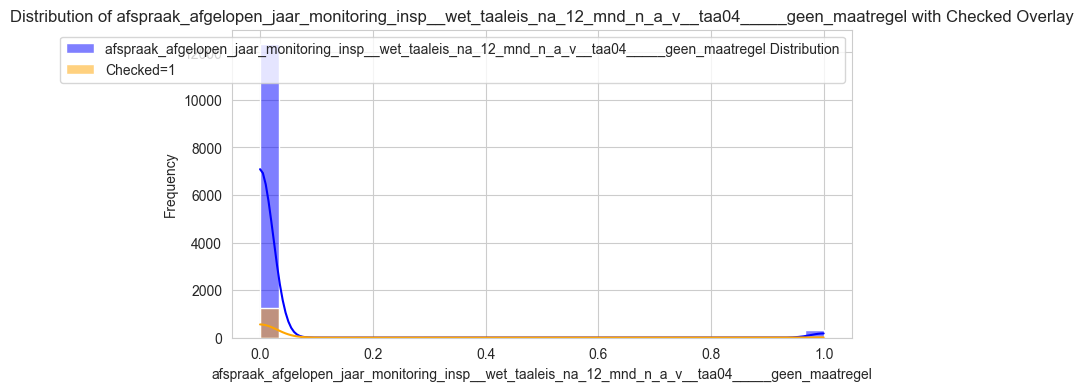

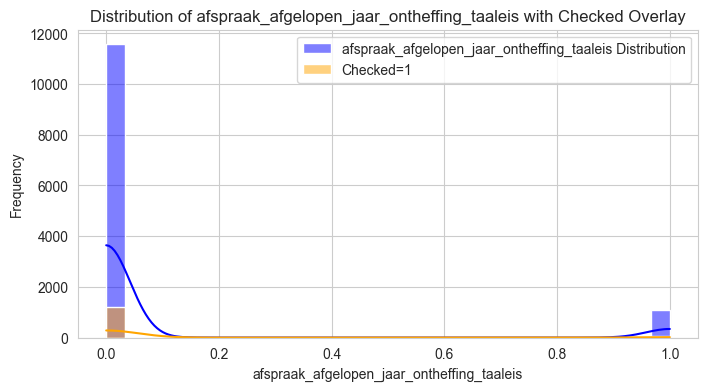

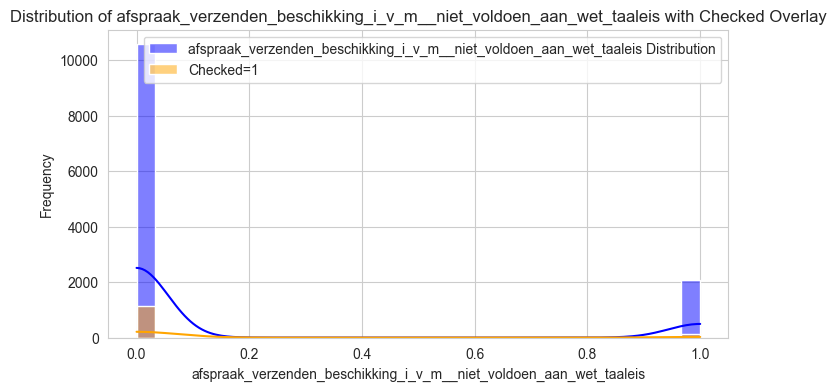

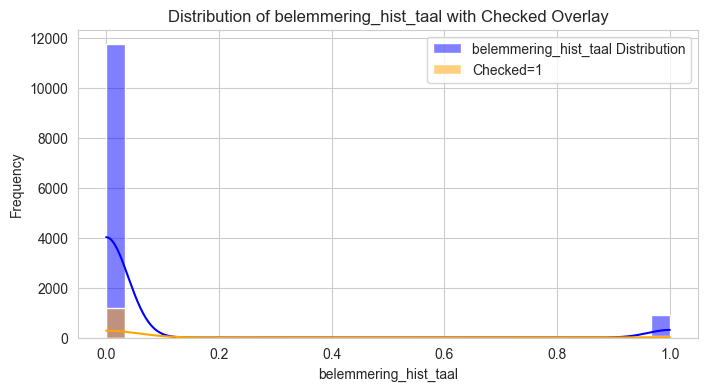

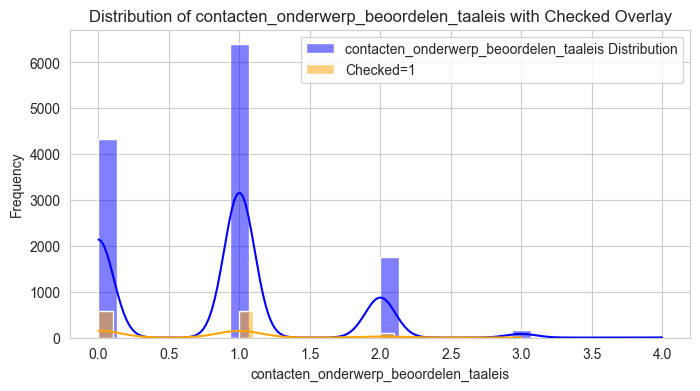

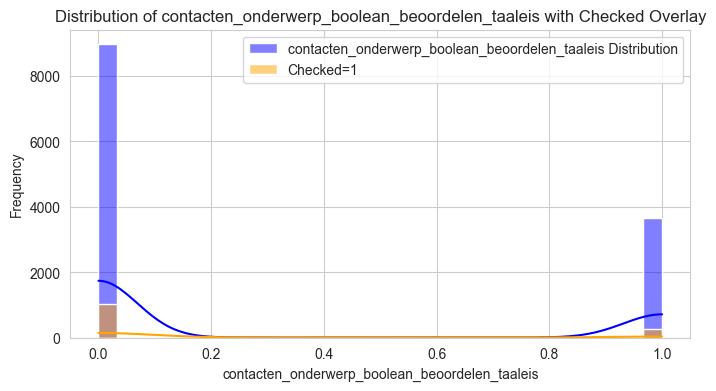

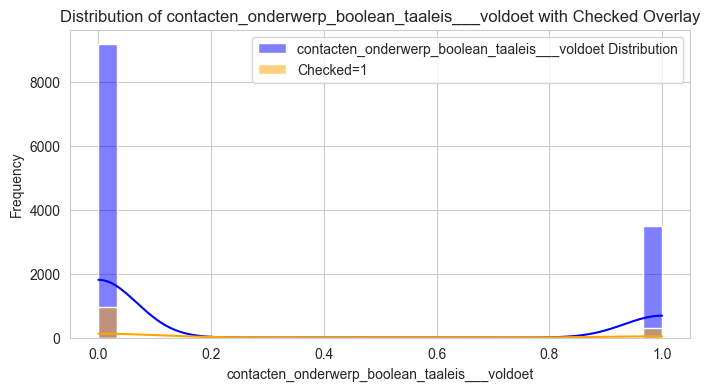

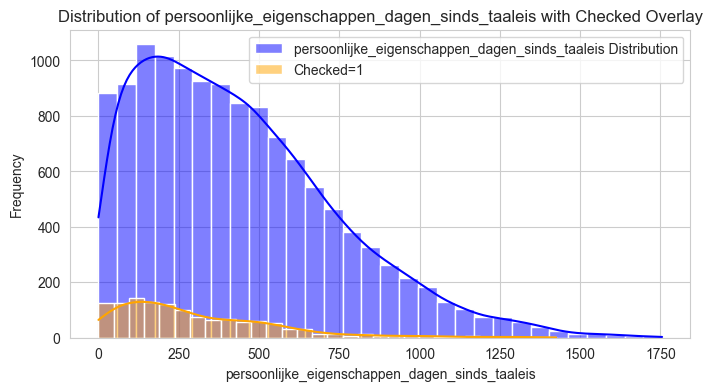

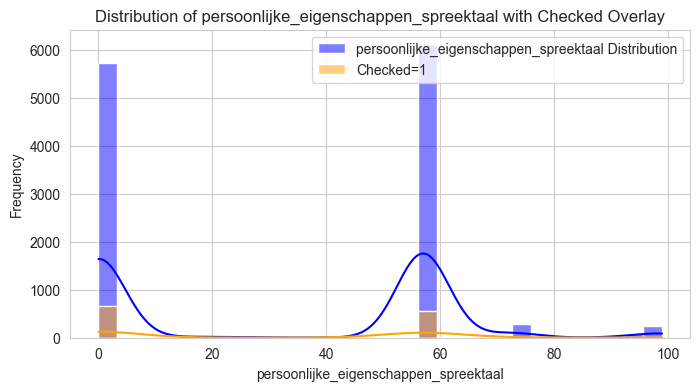

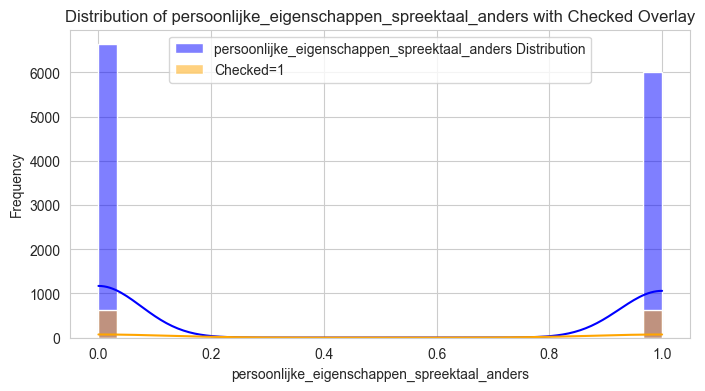

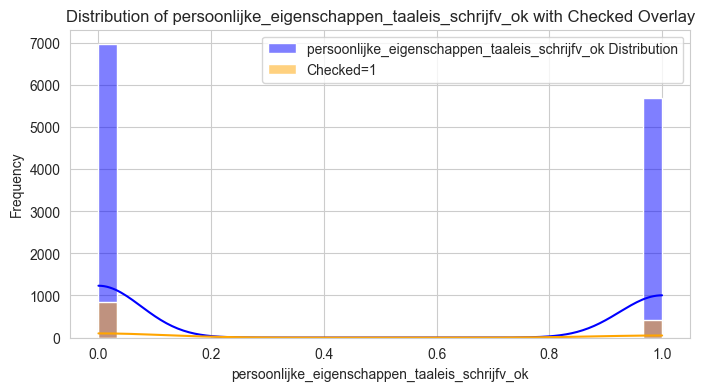

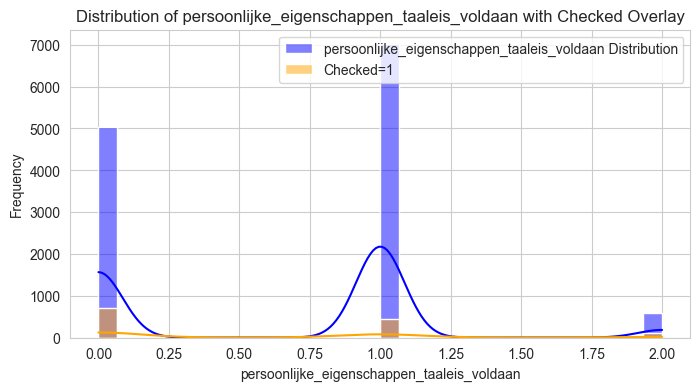

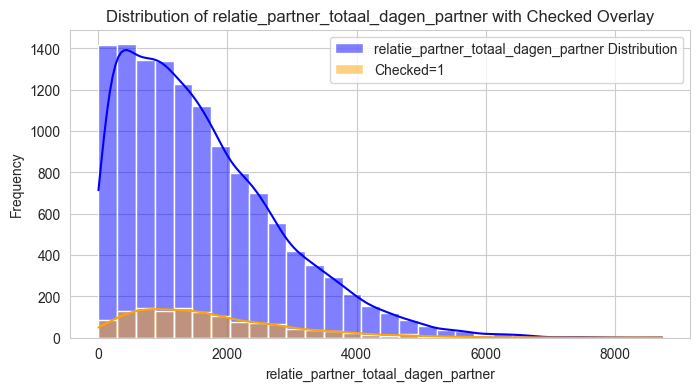

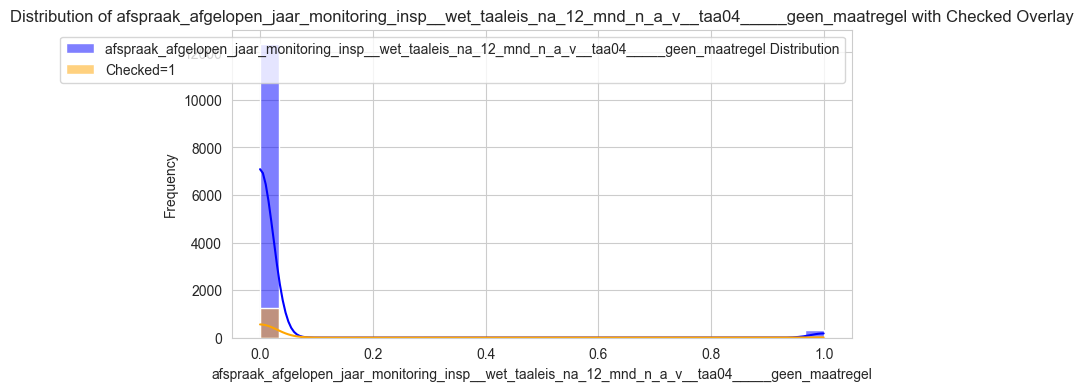

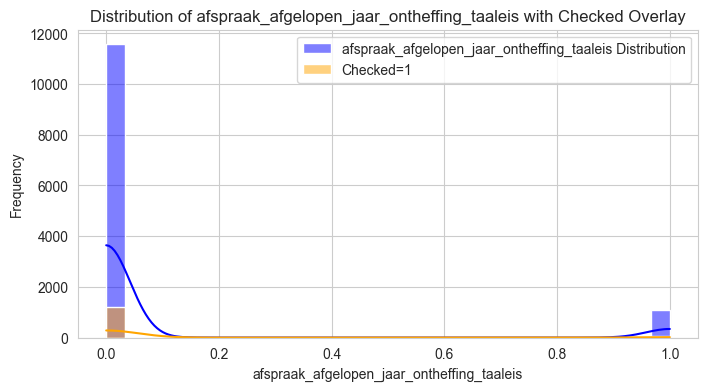

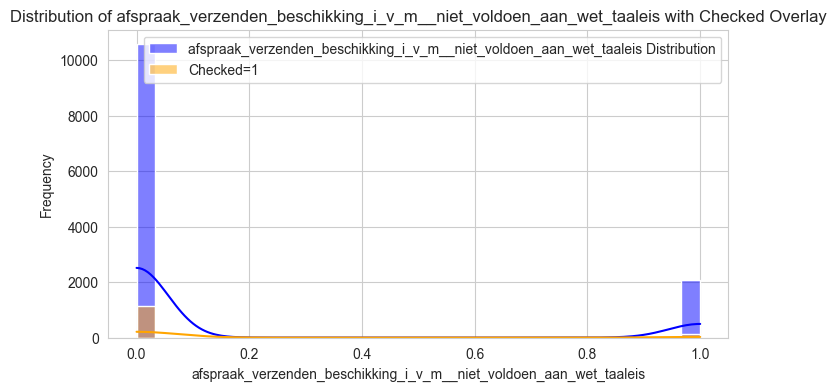

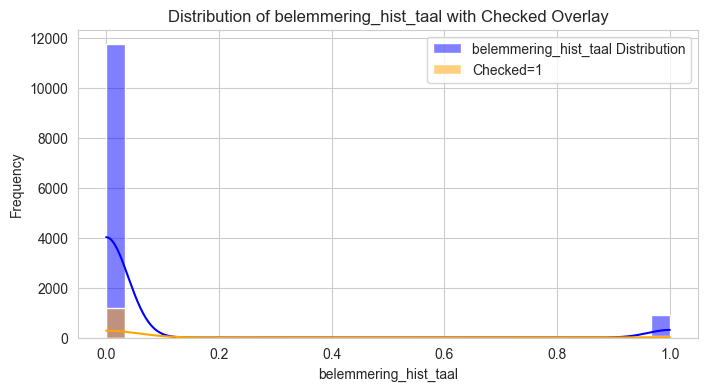

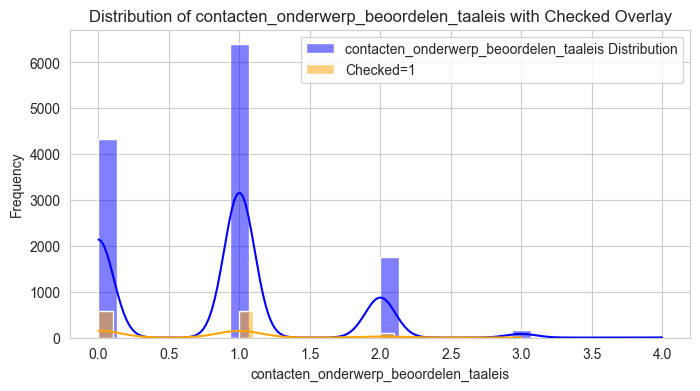

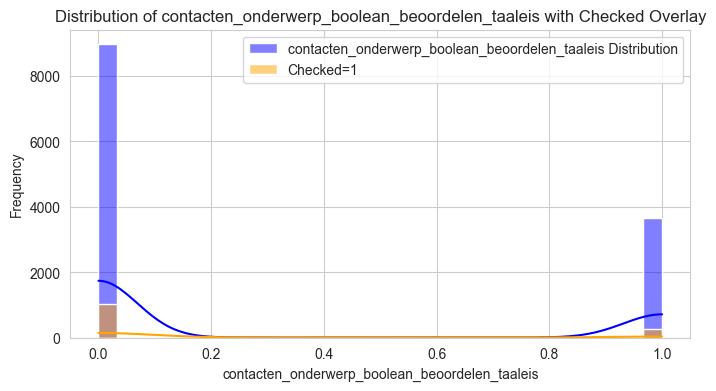

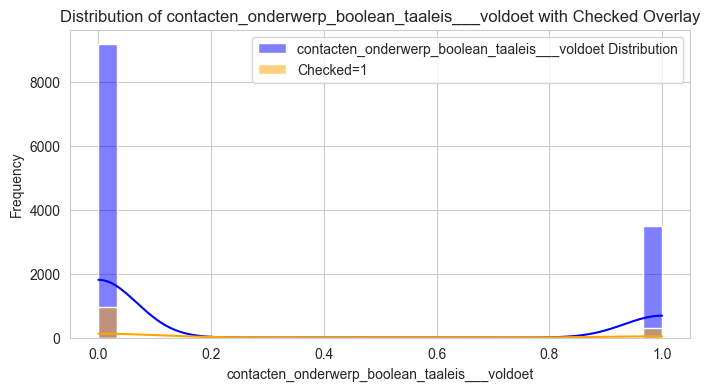

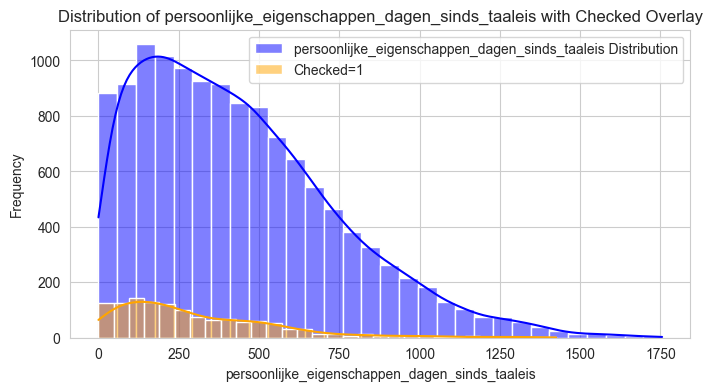

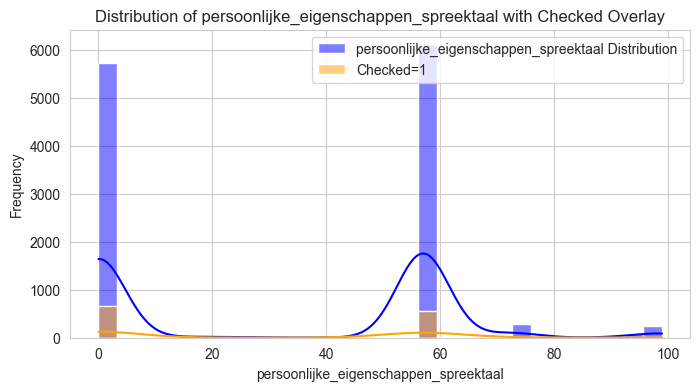

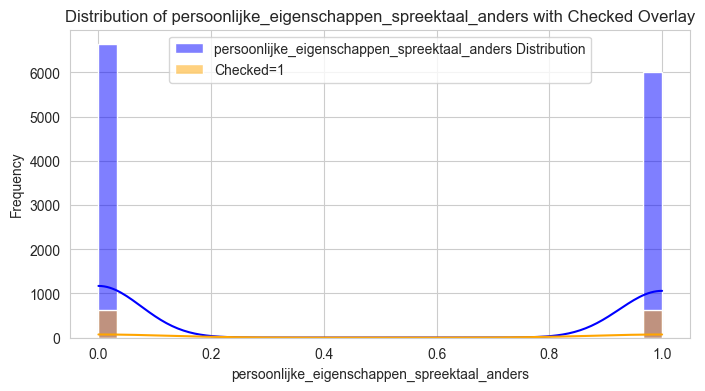

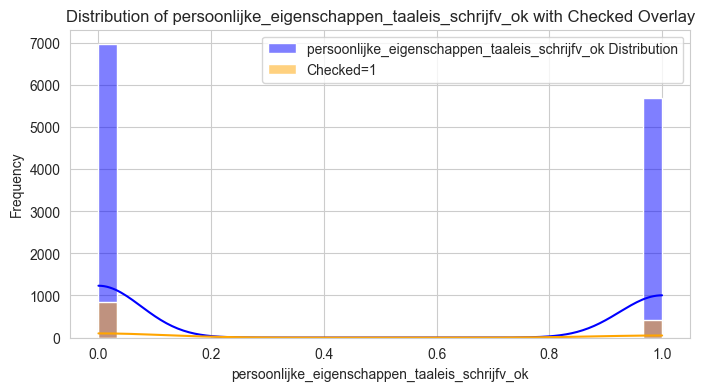

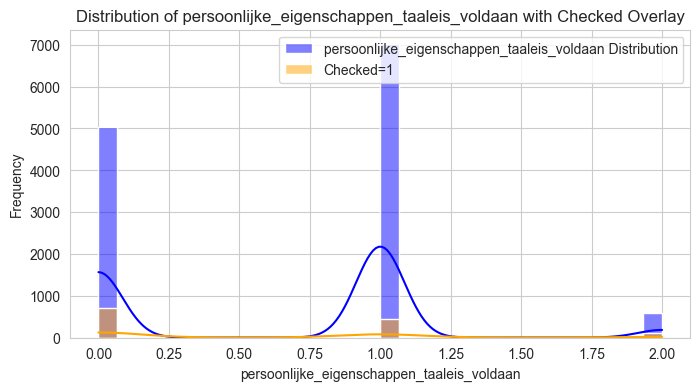

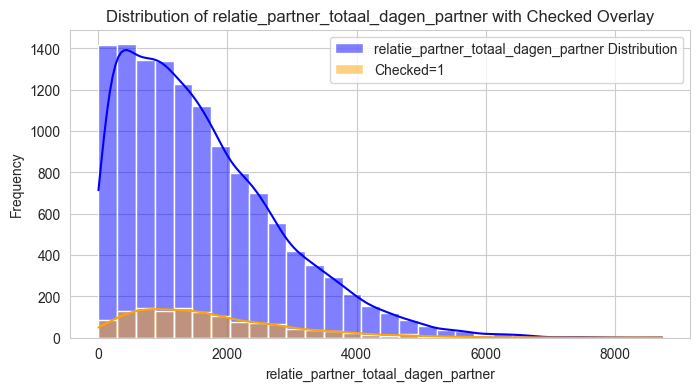

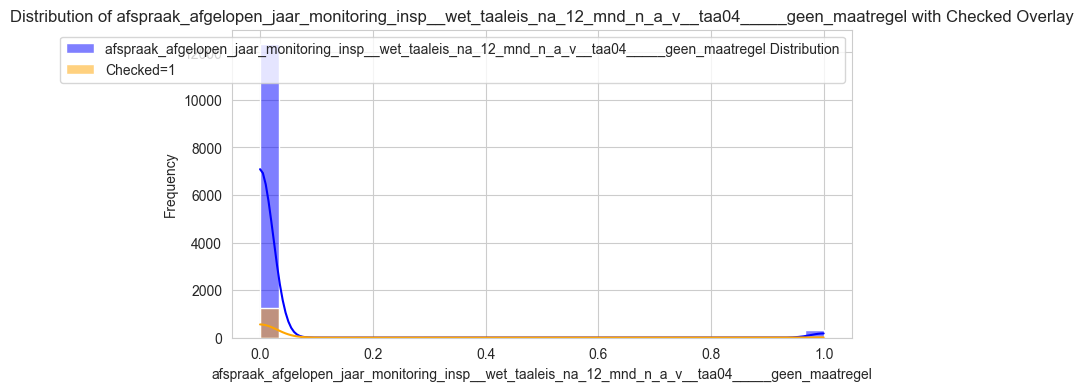

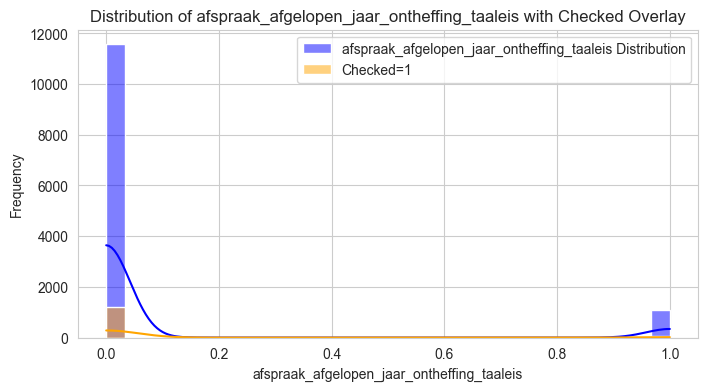

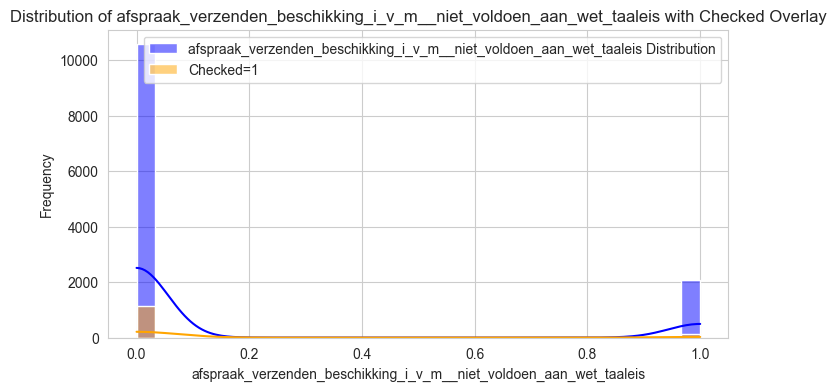

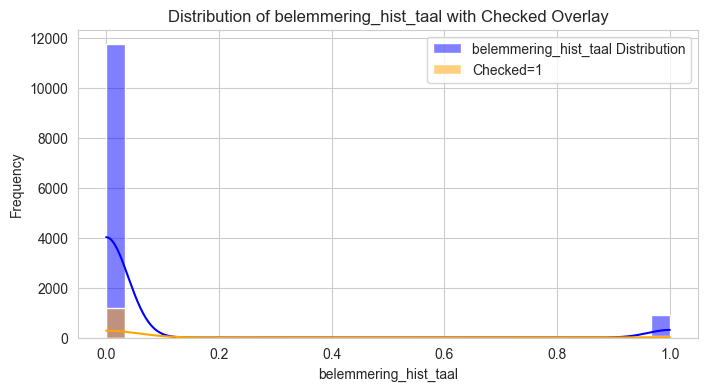

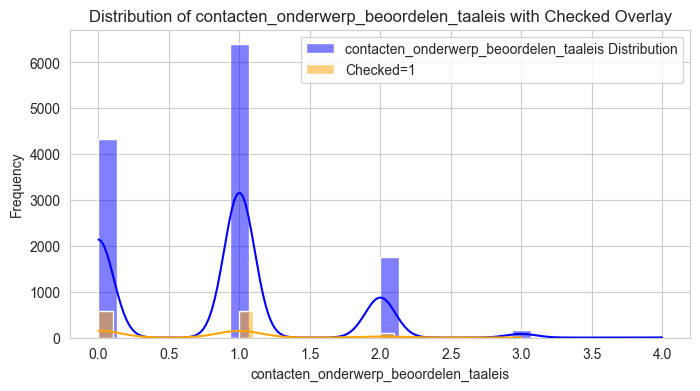

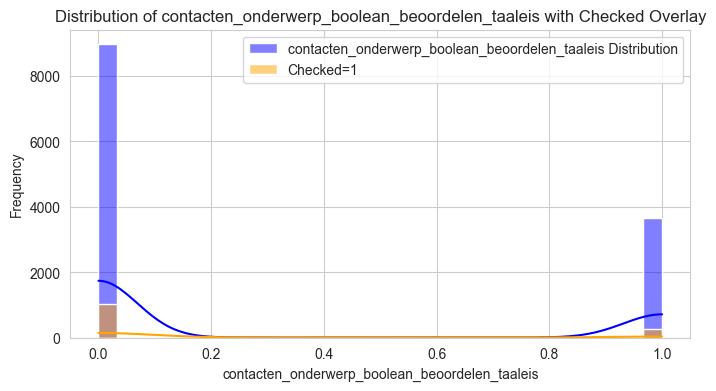

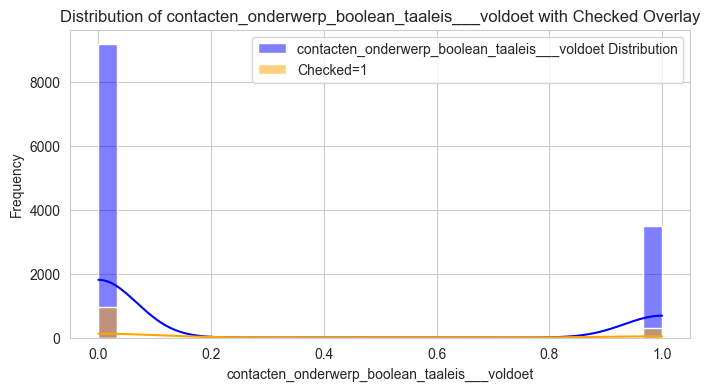

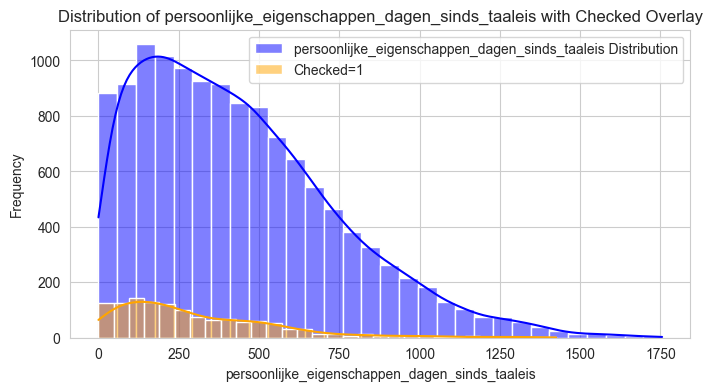

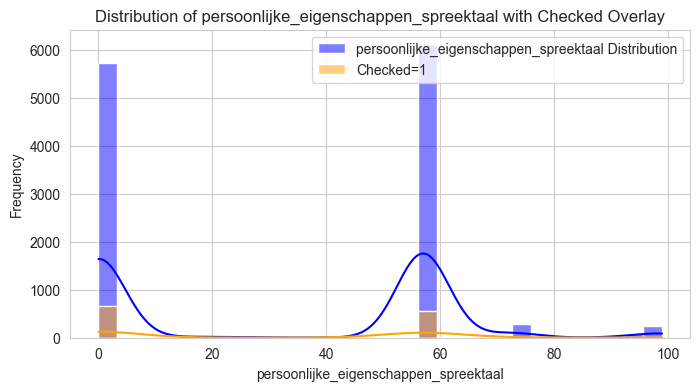

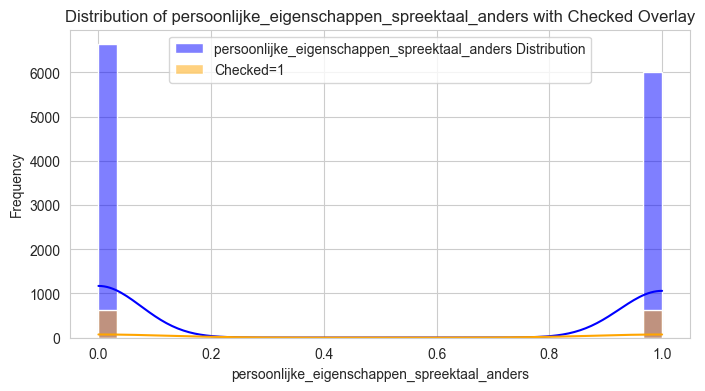

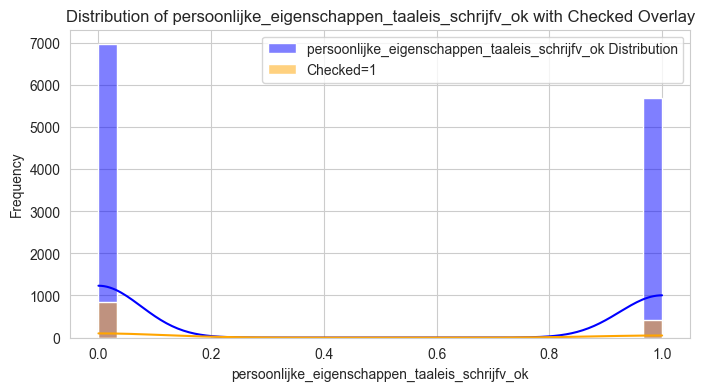

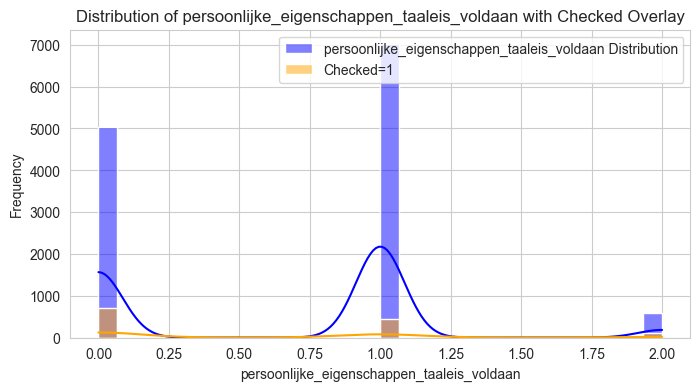

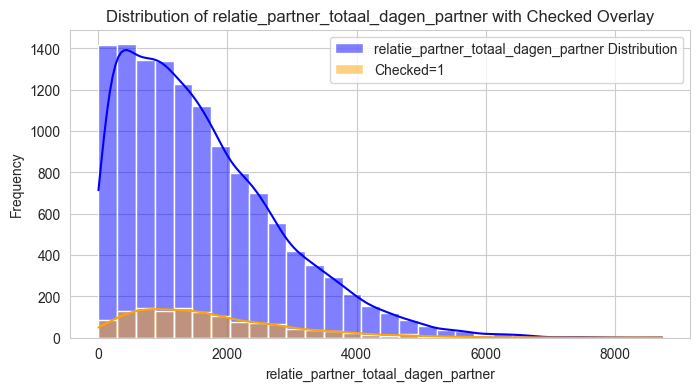

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('data/synth_data_for_training.csv')

# Separate numerical and categorical columns
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = data.select_dtypes(include=['object', 'category']).columns

# Plot distributions for numerical features
for feature in numerical_features:
    if not 'taal' in feature:
        continue
    plt.figure(figsize=(8, 4))

    # Plot the distribution of the feature
    sns.histplot(data[feature], kde=True, bins=30, color="blue", label=f"{feature} Distribution")

    # Overlay the distribution of 'checked'
    sns.histplot(data[data['checked'] == 1][feature], kde=True, bins=30, color="orange", label="Checked=1", alpha=0.5)

    plt.title(f'Distribution of {feature} with Checked Overlay')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# Plot distributions for categorical features
# Overlay distributions for categorical features
for feature in categorical_features:
    plt.figure(figsize=(8, 4))

    # Plot the distribution of the feature
    sns.countplot(x=feature, data=data, order=data[feature].value_counts().index, color="blue", alpha=0.5, label=f"{feature} Distribution")

    # Overlay the distribution of 'checked'
    checked_counts = data[data['checked'] == 1][feature].value_counts()
    checked_counts = checked_counts.reindex(data[feature].value_counts().index) # Ensure same order
    sns.barplot(x=checked_counts.index, y=checked_counts.values, color="orange", alpha=0.7, label="Checked=1")

    plt.title(f'Distribution of {feature} with Checked Overlay')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()
